In [ ]:
import gmaps
import pickle
import IPython
import requests
import random
import simplejson, urllib.request

from google.colab import output
output.enable_custom_widget_manager()

API_KEY = 'Your API Key'

gmaps.configure(api_key=API_KEY)

In [ ]:
with open('bus_stations_loc_new_2.pkl', 'rb') as f:
    bus_stations_loc = pickle.load(f)
with open('routes_index_land.pkl', 'rb') as f:
    routes = pickle.load(f)
with open('bus_stations_new.pkl', 'rb') as f:
    bus_stations = pickle.load(f)

In [ ]:
def duration(origin, destination):
  payload={}
  headers = {}
  base_url = "https://maps.googleapis.com/maps/api/distancematrix/json?origins={0}&destinations={1}&key="
  url = base_url + API_KEY
  origin_coor = str(origin[0]) + "%2C" + str(origin[1])
  dest_coor = str(destination[0]) + "%2C" + str(destination[1])
  url = url.format(origin_coor, dest_coor)
  response = requests.request("GET", url, headers=headers, data=payload)
  result= simplejson.load(urllib.request.urlopen(url))
  driving_time = result['rows'][0]['elements'][0]['duration']['value']
  distance = result['rows'][0]['elements'][0]['distance']['value']
  return driving_time, distance

In [ ]:
for route in range(len(routes)):
  route_time = route_length = 0
  for bus_station in range(len(routes[route])-1):
    origin = bus_stations_loc[bus_stations[routes[route][bus_station]]]
    destination = bus_stations_loc[bus_stations[routes[route][bus_station + 1]]]
    driving_time, distance = duration(origin, destination) 
    route_time += driving_time
    route_length +=  distance
  print(f"Route {route + 1 :<2} : stops = {len(routes[route]) :<2} Length = {(route_length/1000):<5.1f}Km. Duration = {route_time//60} Minutes") 

Route 1  : stops = 17 Length = 29.7 Km. Duration = 35 Minutes
Route 2  : stops = 18 Length = 24.5 Km. Duration = 40 Minutes
Route 3  : stops = 18 Length = 50.4 Km. Duration = 75 Minutes
Route 4  : stops = 14 Length = 15.5 Km. Duration = 28 Minutes
Route 5  : stops = 14 Length = 19.3 Km. Duration = 41 Minutes
Route 6  : stops = 19 Length = 29.2 Km. Duration = 51 Minutes
Route 7  : stops = 18 Length = 25.4 Km. Duration = 57 Minutes
Route 8  : stops = 20 Length = 18.1 Km. Duration = 29 Minutes
Route 9  : stops = 12 Length = 11.9 Km. Duration = 31 Minutes
Route 10 : stops = 19 Length = 16.7 Km. Duration = 35 Minutes
Route 11 : stops = 14 Length = 14.3 Km. Duration = 29 Minutes
Route 12 : stops = 12 Length = 28.1 Km. Duration = 68 Minutes
Route 13 : stops = 9  Length = 13.3 Km. Duration = 19 Minutes
Route 14 : stops = 11 Length = 9.3  Km. Duration = 19 Minutes
Route 15 : stops = 9  Length = 10.9 Km. Duration = 23 Minutes


In [ ]:
starting_point = "Hagen Wendeplatz"
ending_point = "Schlachthof"

depot_layer = gmaps.symbol_layer(
    [bus_stations_loc[starting_point]], hover_text='Depot', info_box_content='Depot', 
    fill_color='white', stroke_color='red', scale=8)

arena_layer = gmaps.symbol_layer(
    [ bus_stations_loc[ending_point]], hover_text='Arena', info_box_content='Arena', 
    fill_color='white', stroke_color='red', scale=8)

bus_station_layer = gmaps.symbol_layer(
    list(bus_stations_loc.values()), hover_text = list(bus_stations_loc.keys()), 
    fill_color='white', stroke_color='black', scale=4)

In [ ]:
def set_fig():
  figure_layout = {
    'width': '100%',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px'}
  fig = gmaps.figure(layout=figure_layout, center = bus_stations_loc[bus_stations[0]], zoom_level = 10)
  #fig.add_layer(depot_layer)
  fig.add_layer(arena_layer)
  #fig.add_layer(gmaps.transit_layer())
  #fig.add_layer(gmaps.bicycling_layer())
  #fig.add_layer(bus_station_layer)
  return fig
fig = set_fig()
fig

In [ ]:
#Luneburg routes
colors = ['blue','red','green','#800080','#000080','#008080','#00FF00', '#808080',
          '#FFFF00', '#00FFFF', '#FF00FF', '#000000', '#800000', '#000080', '#800080', '#BBF90F', '#FAC205']
fig = set_fig()
for route_id in routes:
  waypoints = []
  for b_station in routes[route_id][1:-1]:
    waypoints.append(bus_stations_loc[bus_stations[b_station]])
  route_layer = gmaps.directions_layer(bus_stations_loc[bus_stations[routes[route_id][0]]], bus_stations_loc[bus_stations[routes[route_id][-1]]], waypoints = waypoints,
                                       show_markers = False, stroke_color = colors[route_id], stroke_weight=5,
                                       stroke_opacity=0.5)
  fig.add_layer(route_layer)
fig

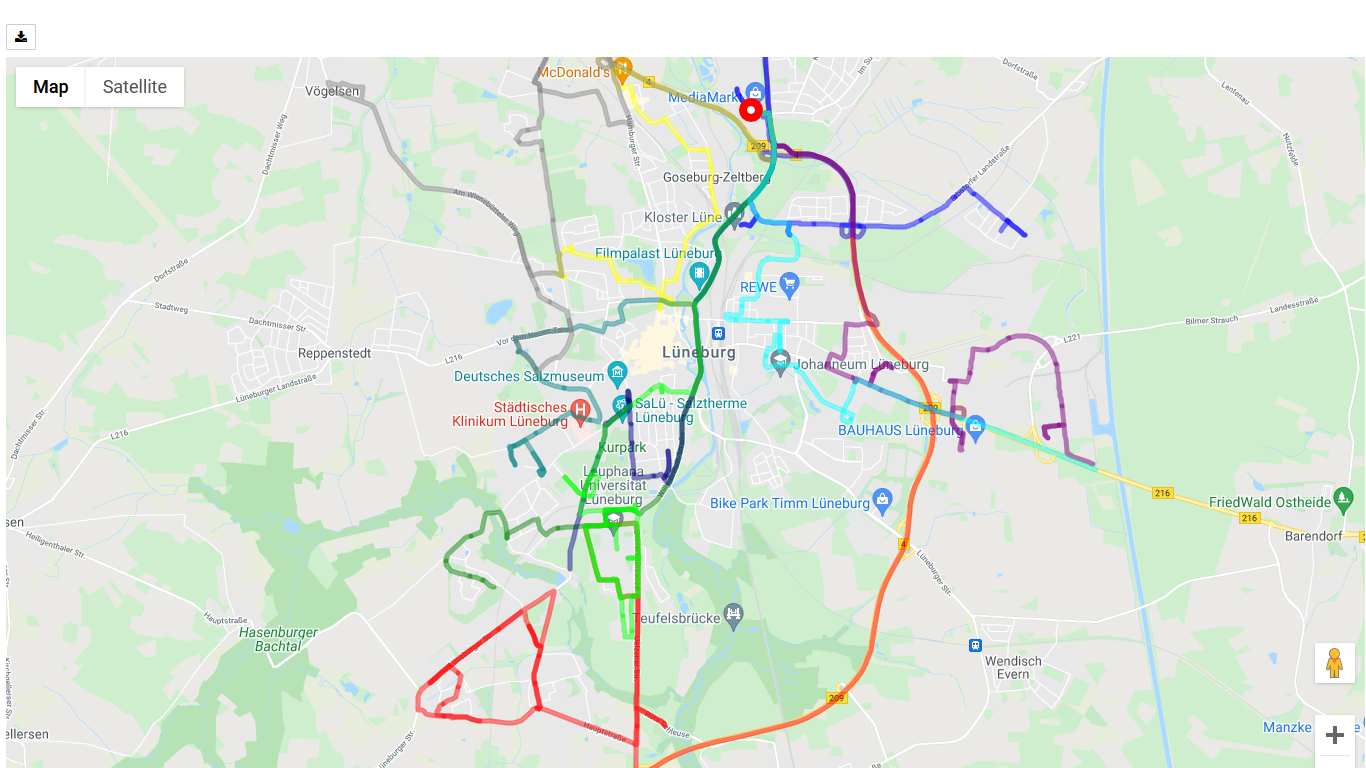

In [ ]:
#Creating random colors for 53 different routes
for j in range(53):
    colors.append("#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)]))

In [ ]:
#Landkreis Routes
fig = set_fig()
for route_id in routes:
  waypoints = []
  for b_station in routes[route_id][1:-1]:
    waypoints.append(bus_stations_loc[bus_stations[b_station]])
  route_layer = gmaps.directions_layer(bus_stations_loc[starting_point], bus_stations_loc[ending_point], waypoints = waypoints,
                                       show_markers = False, stroke_color = colors[route_id], stroke_weight=5,
                                       stroke_opacity=0.5)
  fig.add_layer(route_layer)
fig

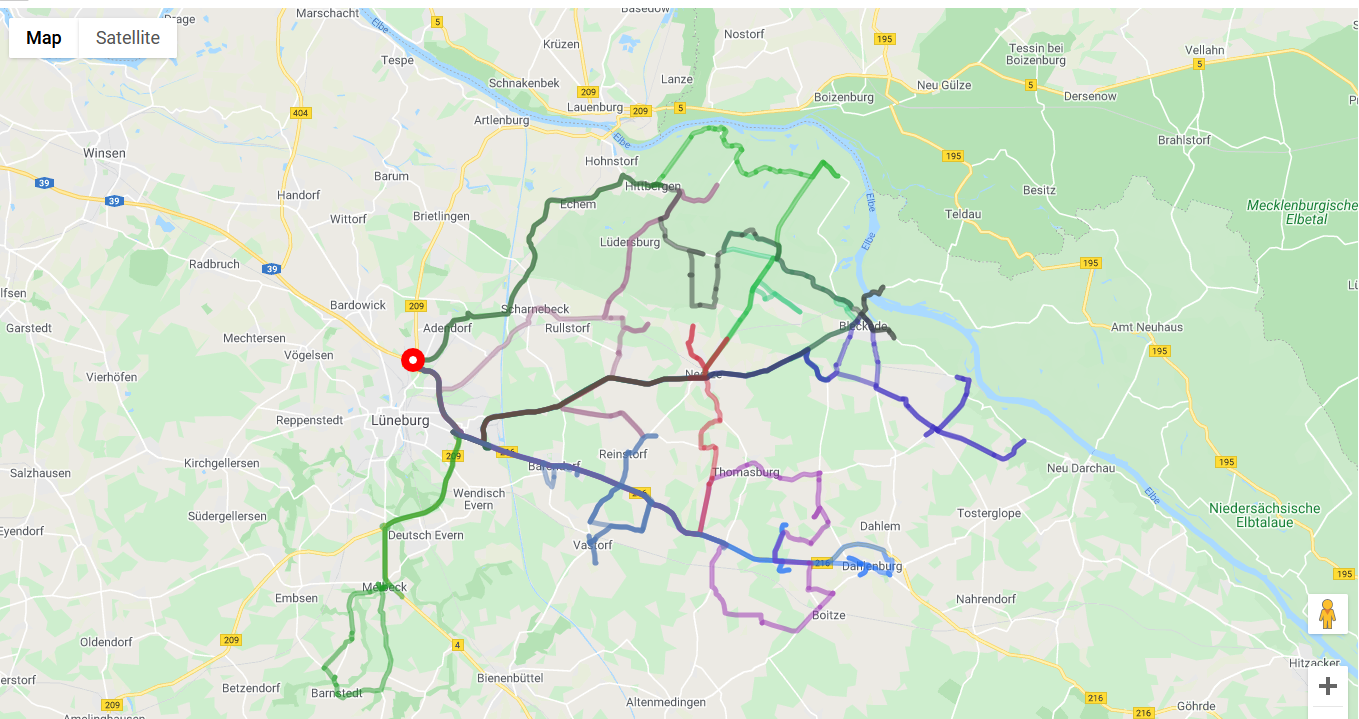

In [ ]:
#Export to HTML
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('bus_stations_new.html', views=[fig])